In [185]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lmfit as lm
from lmfit.models import ExponentialModel
from scipy.stats import pearsonr

In [186]:
# here we want to simulate multi-tau fMRI signal
# the signal has BOLD and non-BOLD components
# by fitting at three tau's of 15ms, 39ms and 63ms
# we want to separate these two components
tau_mean = 40 # mean tau

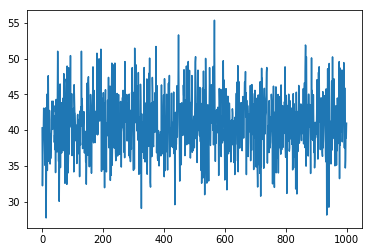

In [187]:
# we are simulating 1001 points of signal_bold and signal_nonbold
t = np.linspace(0,1000,1001)
signal_bold = 40+np.random.normal(1,4,1001)
plt.plot(t,signal_bold)

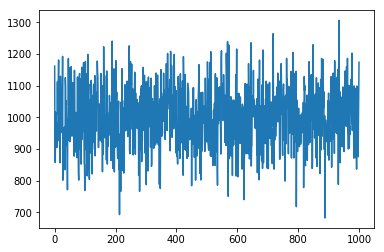

In [188]:
amplitude = 1000
signal_nonbold = amplitude+np.random.normal(0,0.1*amplitude,1001)
plt.plot(t,signal_nonbold)

In [189]:
signal_15 = signal_nonbold*np.exp(-signal_bold/15)
signal_39 = signal_nonbold*np.exp(-signal_bold/39)
signal_63 = signal_nonbold*np.exp(-signal_bold/63)

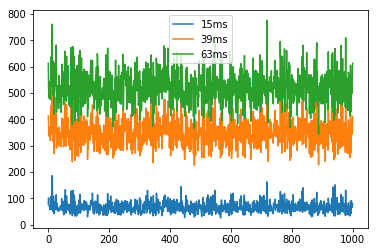

In [190]:
plt.plot(t,signal_15,label="15ms")
plt.plot(t,signal_39,label="39ms")
plt.plot(t,signal_63,label="63ms")
plt.legend()

In [191]:
# we are adding poison noise to the signal
# poisson noise never goes negative
signal_15_measured = np.random.poisson(signal_15)
signal_39_measured = np.random.poisson(signal_39)
signal_63_measured = np.random.poisson(signal_63)

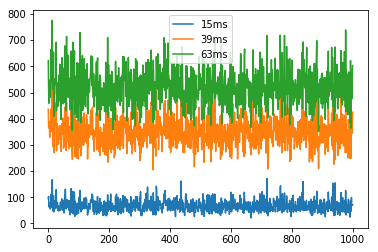

In [192]:
plt.plot(t,signal_15_measured,label="15ms")
plt.plot(t,signal_39_measured,label="39ms")
plt.plot(t,signal_63_measured,label="63ms")
plt.legend()

In [193]:
tau = np.array([15.0,39.0,63.0])
data = np.array([signal_15_measured,signal_39_measured,signal_63_measured]).T
data.shape    

(1001, 3)

In [194]:
# multi-tau model
def multi_tau(tau,s0,t2):
    return s0*np.exp(-t2/tau)
mt_model = lm.Model(multi_tau)

In [195]:
# fitting all the data points
fit_s0 = []
fit_t2 = []
for d in data:
    pars = mt_model.make_params()
    pars['s0'].set(value=100000,min=0,vary=True)
    pars['t2'].set(value=40,min=0,vary=True)
    
    result = mt_model.fit(d,pars,tau=tau)
    fit_s0.append(result.values['s0'])
    fit_t2.append(result.values['t2'])
    

In [196]:
fit_s0 = np.array(fit_s0)
fit_t2 = np.array(fit_t2)

(0.75653833152745653, 1.7842789071071298e-186)


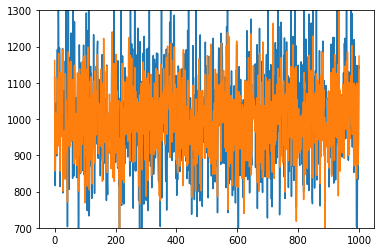

In [197]:
plt.plot(t,fit_s0)
plt.plot(t,signal_nonbold)
plt.ylim(amplitude*.7,amplitude*1.3)
print(pearsonr(fit_s0,signal_nonbold))

(0.747634181924274, 8.8370658750834031e-180)


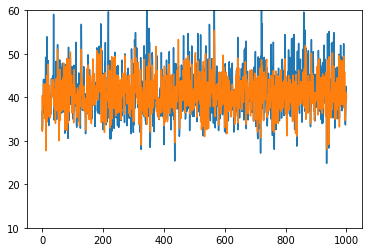

In [198]:
plt.plot(t,fit_t2)
plt.plot(t,signal_bold)
plt.ylim(10,60)
print(pearsonr(fit_t2,signal_bold))